<a href="https://colab.research.google.com/github/ancestor9/Gyeongbok-AI-study/blob/main/2025/%EB%8F%84%EC%9E%A5%EA%B9%A8%EA%B8%B0/08_Dimension_Reduction_Consumer_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: 내 드라이브를 마운트(mount) 하라

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
file_path = '/content/drive/MyDrive/data/df.pkl'
import pandas as pd
df= pd.read_pickle(file_path)
df

,연령,평일인터넷,토요일인터넷,일요일인터넷,평일모바일,토요일모바일,일요일모바일,PPL구입여부,모바일총사용시간,연령_이산화,...,음악,성별_여,지역_경기/인천,지역_광주/전라/제주,지역_대전/충청/세종,지역_부산/울산/경남,직업_학생(재수생포함),학력_고등학교 졸업,결혼여부_기혼,결혼여부_미혼
0,-1.809092,90,105,150,30,30,30,1,90,0.0,...,1,False,False,False,False,False,True,False,False,True
1,-1.809092,60,60,0,30,30,60,0,120,0.0,...,1,False,False,False,False,False,True,False,False,True
2,-1.809092,10,30,0,120,180,120,0,420,0.0,...,1,False,False,False,False,False,True,False,False,True
3,-1.809092,90,90,90,90,120,120,1,330,0.0,...,1,False,False,False,False,False,True,False,False,True
4,-1.809092,60,105,120,30,60,60,0,150,0.0,...,0,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.105553,60,60,0,60,60,60,1,180,4.0,...,0,True,False,True,False,False,False,False,False,False
7996,1.436763,60,60,0,30,30,30,0,90,4.0,...,0,True,False,True,False,False,False,True,True,False
7997,1.304279,60,60,0,30,30,30,0,90,4.0,...,0,True,False,True,False,False,False,False,True,False
7998,1.701731,60,60,0,30,30,30,0,90,4.0,...,0,True,False,True,False,False,False,False,False,False


<img src ='https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.02-samples-features.png'>

In [4]:
# prompt: 'PPL구입여부'는 y,  나머지 변수에서 year_2019를 제외하고 X로 만들어줘

y = df['PPL구입여부']
X = df.drop(columns=['PPL구입여부'])


In [5]:
X.head()

,연령,평일인터넷,토요일인터넷,일요일인터넷,평일모바일,토요일모바일,일요일모바일,모바일총사용시간,연령_이산화,가족드라마,...,음악,성별_여,지역_경기/인천,지역_광주/전라/제주,지역_대전/충청/세종,지역_부산/울산/경남,직업_학생(재수생포함),학력_고등학교 졸업,결혼여부_기혼,결혼여부_미혼
0,-1.809092,90,105,150,30,30,30,90,0.0,0,...,1,False,False,False,False,False,True,False,False,True
1,-1.809092,60,60,0,30,30,60,120,0.0,1,...,1,False,False,False,False,False,True,False,False,True
2,-1.809092,10,30,0,120,180,120,420,0.0,0,...,1,False,False,False,False,False,True,False,False,True
3,-1.809092,90,90,90,90,120,120,330,0.0,0,...,1,False,False,False,False,False,True,False,False,True
4,-1.809092,60,105,120,30,60,60,150,0.0,0,...,0,False,False,False,False,False,True,False,False,True


In [6]:
y.head()

,PPL구입여부
0,1
1,0
2,0
3,1
4,0


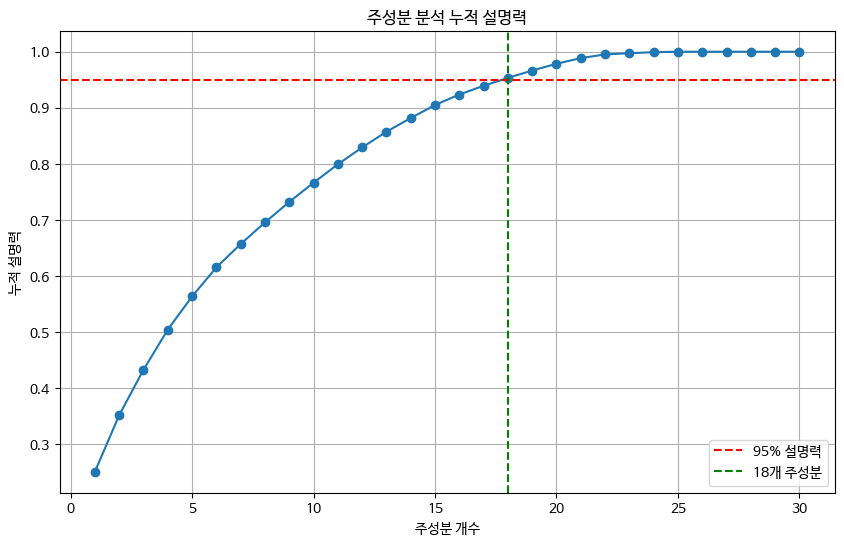

95%의 분산을 설명하는데 필요한 주성분의 개수: 18


In [7]:
# prompt: X를 주성분분석으로 어느 차원까지 설명력이 되는지 시각화해줘

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용 (설명력 95% 목표)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 누적 설명력 계산
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumsum) + 1), explained_variance_ratio_cumsum, marker='o')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명력')
plt.title('주성분 분석 누적 설명력')
plt.grid(True)

# 설명력 95% 달성 지점 표시
n_components_95 = np.argmax(explained_variance_ratio_cumsum >= 0.95) + 1
plt.axhline(y=0.95, color='r', linestyle='--', label='95% 설명력')
plt.axvline(x=n_components_95, color='g', linestyle='--', label=f'{n_components_95}개 주성분')

plt.legend()
plt.show()

print(f"95%의 분산을 설명하는데 필요한 주성분의 개수: {n_components_95}")


In [8]:
# prompt: 주성분 10개로 데이터를 변형해줘

# 주성분 10개로 PCA 적용
pca_10 = PCA(n_components=10)
X_pca_10 = pca_10.fit_transform(X_scaled)

# 변환된 데이터 확인
print(X_pca_10.shape)
print(X_pca_10[:5]) # 처음 5개 데이터 출력


(8000, 10)
[[-4.8342273  -4.24751282 -1.34786616 -1.22634711 -2.91479403  1.42212528
   0.52697359  0.44952713  0.20981249 -0.08787586]
 [-3.73076478 -3.97148899 -3.02808193 -0.06189751  0.98950414  0.19284287
   1.16773031 -0.04042295  0.1190699   0.71773179]
 [-5.56936334 -2.29265729 -0.63208053  1.71595636  0.98373087 -2.3237695
  -0.50479669  0.45490441  0.24133442 -0.39893464]
 [-5.63187817 -2.04573857 -2.48661093  0.14499226 -1.491954    0.91195095
   0.26966371 -0.42824891  0.41046026  0.93786549]
 [-3.54772127 -1.51448368  1.50218397 -3.63210294 -0.7165612   1.01873577
  -0.14184087  0.07333821  0.01831285  0.26966406]]


In [9]:
# prompt: X, y를 바탕으로 예측모형과 X_pca_10, y로 예측 모형을 의사결정나무로 적용하고 정확도를 비교해줘

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 분할 (X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 분할 (X_pca_10, y)
X_pca_10_train, X_pca_10_test, y_pca_10_train, y_pca_10_test = train_test_split(X_pca_10, y, test_size=0.2, random_state=42)

# 의사결정나무 모델 생성 및 학습 (X, y)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 예측 및 정확도 평가 (X, y)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"X, y 데이터셋에 대한 의사결정나무 모델 정확도: {accuracy}")

# 의사결정나무 모델 생성 및 학습 (X_pca_10, y)
dt_pca_model = DecisionTreeClassifier(random_state=42)
dt_pca_model.fit(X_pca_10_train, y_pca_10_train)

# 예측 및 정확도 평가 (X_pca_10, y)
y_pca_pred = dt_pca_model.predict(X_pca_10_test)
pca_accuracy = accuracy_score(y_pca_10_test, y_pca_pred)
print(f"X_pca_10, y 데이터셋에 대한 의사결정나무 모델 정확도: {pca_accuracy}")


X, y 데이터셋에 대한 의사결정나무 모델 정확도: 0.706875
X_pca_10, y 데이터셋에 대한 의사결정나무 모델 정확도: 0.729375
